# Assignment 2 – Exploratory Data Analysis

#### Problem Statement:  Using the waiter’s tip data set, perform the following analysis to understand what how tips to waiter is influenced by various parameters 

#### File Name: tips.csv 

####  Description for individual columns

- total_bill: bill in dollars 
- tip: tip in dollars 
- sex: gender of the bill payer 
- smoker: whether there were smokers in the party 
- day: day of the week 
- time: time of day 
- size: size of the party 

#### Questions: 

- Calculate average tip by the following groups and visualize the same using bar charts (use subplots) 
    - Gender,  
    - Size of the party 
    - Smoker vs Non-Smoker 
    - Day of the week 

- Create box plot for tip amount column. Split the box plot by above mentioned categories (use subplots) 
- Using the above bar charts & box plots, identify which group influences the tip amount the most 
- Visualize the relationship between total bill amount vs tip amount using scatter plot. The metric of interest should always be in the Y-axis. Here we are interested in understanding the tip pattern. Hence Y-axis should be tip amount and X axis should be total bill 
- Based on the above scatter plot, what do you think the waiter will do. Will he/she make you eat more or less to get good tip?
- Substantiate your above inference through appropriate statistical test
- In the above scatter plot, color each circle by gender and list down your inferences

##### Common import statements and functions 

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [45]:
waiters_tip_data = pd.read_csv("tips.csv")

In [46]:
waiters_tip_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


##### Answer 1. Calculate average tip by the following groups and visualize the same using bar charts (use subplots) 

In [47]:
def tips_by_group(column='sex', aggr='mean'):
    return waiters_tip_data[waiters_tip_data.columns].groupby(by=column).agg(aggr).sort_values(by='tip')

In [48]:
avg_tips_gender = tips_by_group(aggr='mean', column='sex')
avg_tips_size = tips_by_group(aggr='mean', column='size')
avg_tips_smoker = tips_by_group(aggr='mean', column='smoker')
avg_tips_day = tips_by_group(aggr='mean', column='day')

###### Visualization of results 

In [49]:
# Average tip by Gender
avg_tips_gender['tip']

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

In [50]:
# Average tip by party size
avg_tips_size['tip']

size
1    1.437500
2    2.582308
3    3.393158
5    4.028000
4    4.135405
6    5.225000
Name: tip, dtype: float64

In [51]:
# Average tip by smoker (Yes)/ non-smoker (No)
avg_tips_smoker['tip']

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

In [52]:
# Average tip by party day
avg_tips_day['tip']

day
Fri     2.734737
Thur    2.771452
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

###### Plotting the bars 

Text(0.5, 1.0, 'Average tip by party day')

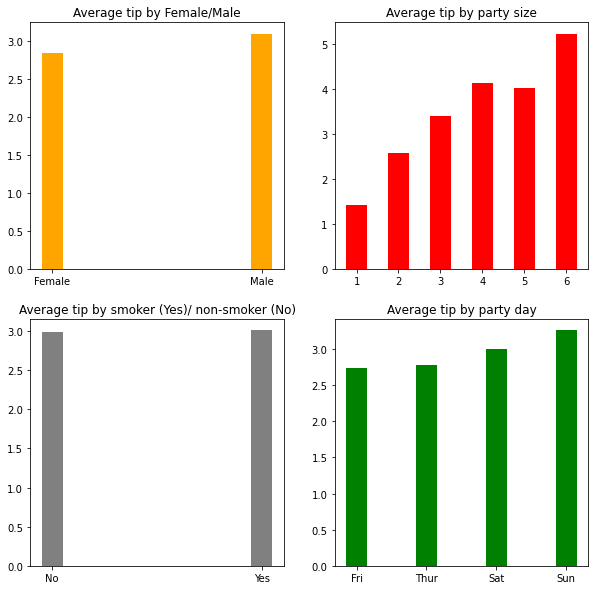

In [53]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax[0][0].bar(avg_tips_gender.index, avg_tips_gender['tip'], width=0.1, color="orange")
ax[0][0].set_title("Average tip by Female/Male")

ax[0][1].bar(avg_tips_size.index, avg_tips_size['tip'], width=0.5, color='red')
ax[0][1].set_title("Average tip by party size")

ax[1][0].bar(avg_tips_smoker.index, avg_tips_smoker['tip'], width=0.1, color="grey")
ax[1][0].set_title("Average tip by smoker (Yes)/ non-smoker (No)")

ax[1][1].bar(avg_tips_day.index, avg_tips_day['tip'], width=0.3, color="green")
ax[1][1].set_title("Average tip by party day")

#### Answer 2: Create box plot for tip amount column. Split the box plot by above mentioned categories (use subplots) 

###### Creating the boxplot for the tip column

{'whiskers': [<matplotlib.lines.Line2D at 0x7fae06f96f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fae0ad9d640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fae06f96be0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fae0ad9dd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fae0adaa0a0>],
 'means': []}

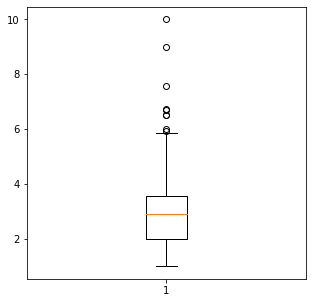

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.boxplot(waiters_tip_data['tip'])

###### Splitting the above bloxplot into the four categories using subplots

In [55]:
def plot_boxes(boxplot_data_selection, waiters_tip_data):
    columns = boxplot_data_selection["columns"]
    titles = boxplot_data_selection["titles"]
    axis = boxplot_data_selection["axis"]
    nrows = ncols = int(round(len(columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,15))
    index = 0;
    for column in columns:
        ax0 = axis[index][0]
        ax1 = axis[index][1]
        title = titles[index]
        data = []
        waiter_unique_vals = waiters_tip_data[column].unique()
        for val in waiter_unique_vals: 
            data.append(waiters_tip_data[waiters_tip_data[column]==val]['tip'])
        
        ax[ax0][ax1].boxplot(data)        
        ax[ax0][ax1].set_title(title)       
        ax[ax0][ax1].set_xlabel(column) 
        ax[ax0][ax1].grid()
        plt.setp(ax[ax0][ax1], xticks=[x+1 for x in range(len(waiter_unique_vals))], xticklabels=waiter_unique_vals)
        index = index+1
    print("Box plots for tip amount column")

Box plots for tip amount column


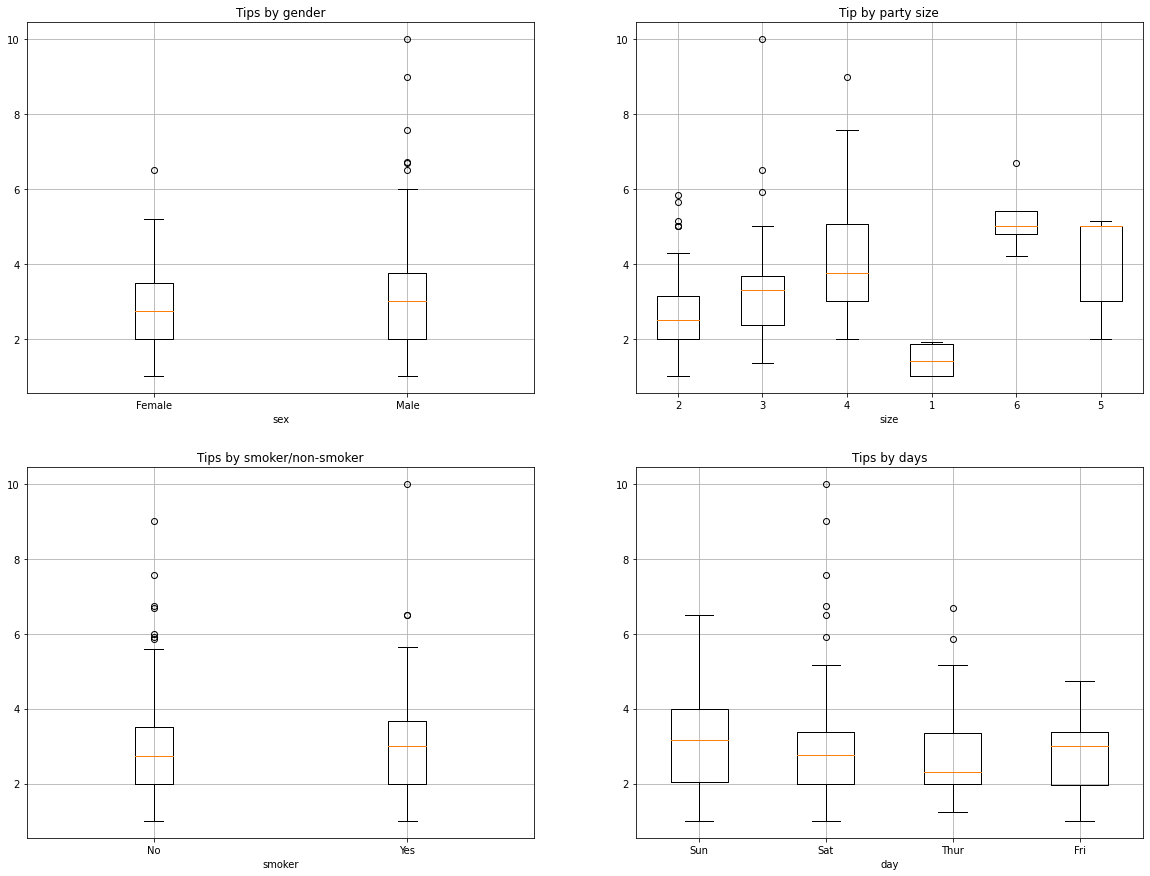

In [56]:
boxplot_data_selection = {
    "columns":['sex', 'size', 'smoker', 'day'],
    "titles":["Tips by gender","Tip by party size","Tips by smoker/non-smoker","Tips by days"],
    "axis": [[0,0], [0,1], [1,0], [1,1]]
}
plot_boxes(boxplot_data_selection, waiters_tip_data)

###### Splitting the tip bloxplot into the four categories using pandas boxplot

<AxesSubplot:title={'center':'tip'}, xlabel='day'>

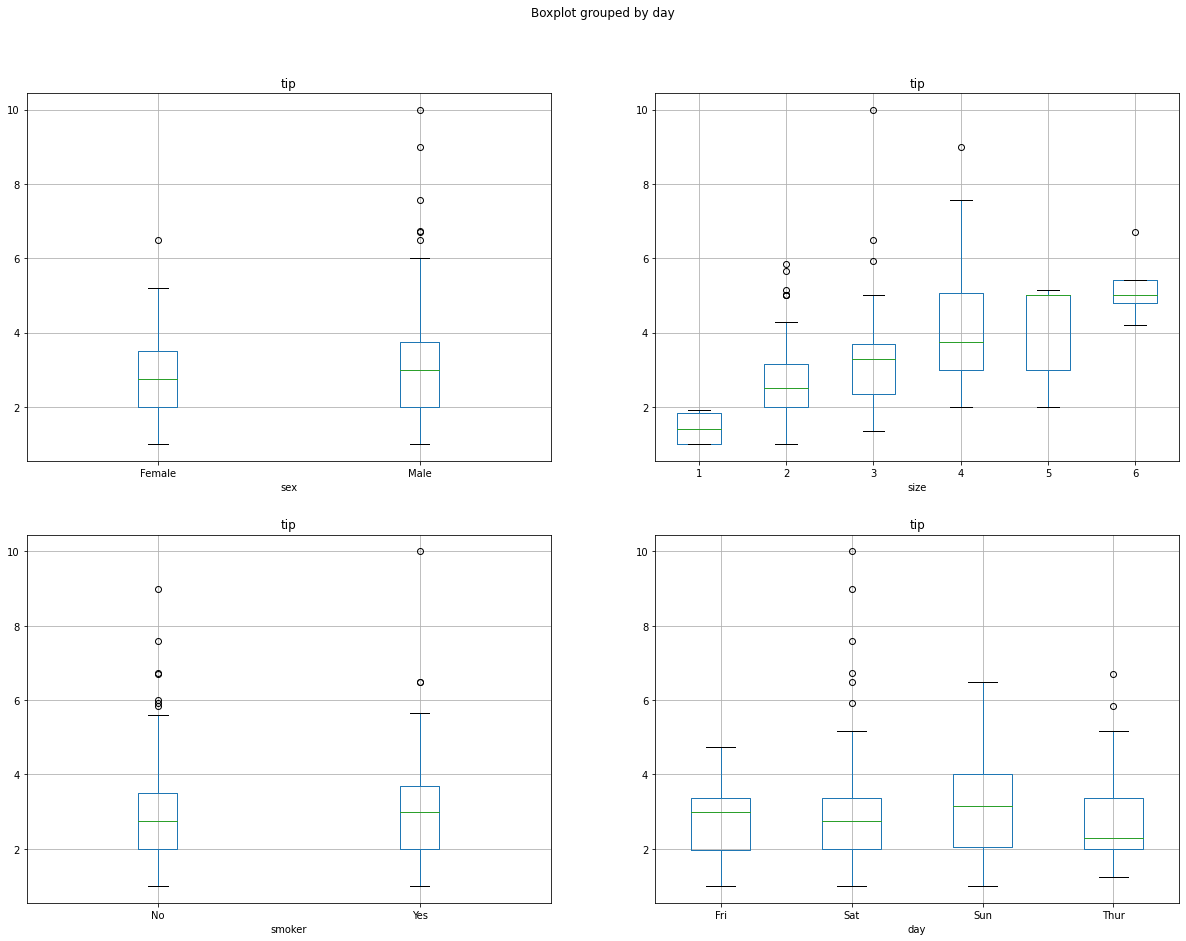

In [57]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))
waiters_tip_data.boxplot(column='tip', by='sex', ax=ax[0][0])
waiters_tip_data.boxplot(column='tip', by='size', ax=ax[0][1])
waiters_tip_data.boxplot(column='tip', by='smoker', ax=ax[1][0])
waiters_tip_data.boxplot(column='tip', by='day', ax=ax[1][1])

###### Splitting the tip bloxplot into the four categories using sing seaborn 

Text(0.5, 1.0, 'Tips by party day')

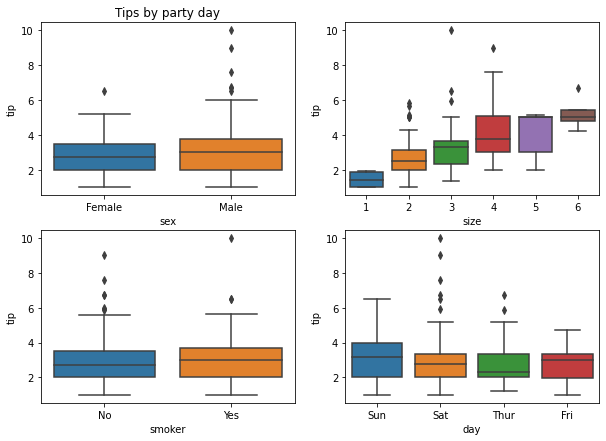

In [67]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
sns.boxplot(data=waiters_tip_data, y='tip', x='sex', ax=ax[0,0])
sns.boxplot(data=waiters_tip_data, y='tip', x='size', ax=ax[0,1])
sns.boxplot(data=waiters_tip_data, y='tip', x='smoker', ax=ax[1,0])
sns.boxplot(data=waiters_tip_data, y='tip', x='day', ax=ax[1,1])
ax[0,0].set_title("Tips by Female/Male")
ax[0,0].set_title("Tips by party size")
ax[0,0].set_title("Tips by smokers / non-smokers")
ax[0,0].set_title("Tips by party day")

#### Answer 3: Using the above bar charts & box plots, identify which group influences the tip amount the most

###### Effect of different factors of a party on the tips 
- Find IQR value : this will provide the range information for the tips
- Find Higher Whisker: this will help to provide positive outliers 
- Find Lower Whisker: this will help to provide negative outliers 
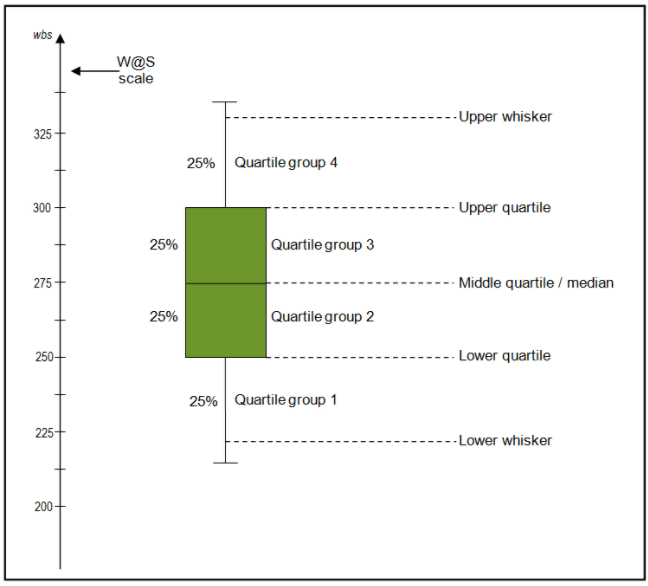

###### Following conclusions can be drawn from the above four boxplots and bar charts
- "Size" group have the maximum upper whisker for the boxplot
- IQR is maximum when the size of a party is 4
- Party size also shows linear correlation with the tip amount

###### Tip Outliers analysis

In [60]:
def tip_outliers(by='', value=''): 
    if value!='':
        tip_by_value = waiters_tip_data[waiters_tip_data[by]==value]
    else:
        tip_by_value = waiters_tip_data
        
    tip_by_value_q1 = tip_by_value['tip'].quantile(0.25) 
    tip_by_value_q3 = tip_by_value['tip'].quantile(0.75) 
    tip_by_value_iqr = tip_by_value_q3 - tip_by_value_q1
    tip_by_value_lw = tip_by_value_q1 - 1.5 * tip_by_value_iqr 
    tip_by_value_uw = tip_by_value_q1 + 1.5 * tip_by_value_iqr

    tip_by_value_outliers = tip_by_value[(tip_by_value['tip']>tip_by_value_uw) | (tip_by_value['tip']<tip_by_value_lw)]
    return tip_by_value_outliers, tip_by_value_iqr, tip_by_value_lw, tip_by_value_uw

In [17]:
def show_bp_analysis(by, value):
    tip_ol, iqr, lw, uw = tip_outliers(by=by, value=value)
    print("Tip outliers Group [",by, "]",", Value [", value, "]")
    print("IQR size (%f)" %iqr)
    print("Lower Whisker (%f)" %lw)
    print("Upper Whisker (%f)" %uw)
    return tip_ol[["total_bill","tip",by]]

In [18]:
show_bp_analysis(by='size', value=4)

Tip outliers Group [ size ] , Value [ 4 ]
IQR size (2.070000)
Lower Whisker (-0.105000)
Upper Whisker (6.105000)


,total_bill,tip,size
23,39.42,7.58,4
59,48.27,6.73,4
183,23.17,6.50,4
212,48.33,9.00,4


In [19]:
show_bp_analysis(by='size', value=5)

Tip outliers Group [ size ] , Value [ 5 ]
IQR size (2.000000)
Lower Whisker (0.000000)
Upper Whisker (6.000000)


,total_bill,tip,size


In [20]:
show_bp_analysis(by='size', value=6)

Tip outliers Group [ size ] , Value [ 6 ]
IQR size (0.625000)
Lower Whisker (3.862500)
Upper Whisker (5.737500)


,total_bill,tip,size
141,34.3,6.7,6


In [21]:
pd.get_dummies(waiters_tip_data).corr()['tip'].sort_values(ascending=False)

tip            1.000000
total_bill     0.675734
size           0.489299
day_Sun        0.125114
time_Dinner    0.121629
sex_Male       0.088862
smoker_Yes     0.005929
day_Sat       -0.002790
smoker_No     -0.005929
day_Fri       -0.055463
sex_Female    -0.088862
day_Thur      -0.095879
time_Lunch    -0.121629
Name: tip, dtype: float64

Form the above analysis we can conclude that tip is most linearly correlated with total_bill and then with **size of the party**

###### Answer 4: Visualize the relationship between total bill amount vs tip amount using scatter plot. The metric of interest should always be in the Y-axis. Here we are interested in understanding the tip pattern. Hence Y-axis should be tip amount and X axis should be total bill

<AxesSubplot:title={'center':'Scatter plot to visualize the tip amount with total bill'}, xlabel='Total Bill', ylabel='Tip Amount'>

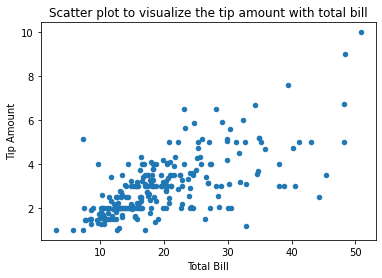

In [22]:
waiters_tip_data.plot(kind='scatter', x='total_bill', y='tip', title='Scatter plot to visualize the tip amount with total bill', ylabel='Tip Amount', xlabel='Total Bill')

###### Answer 5: Based on the above scatter plot, what do you think the waiter will do. Will he/she make you eat more or less to get good tip?

- Based on the scatter plot, waiter will make you eat more as there is a positive linear relation can be seen from the graph. However, it is also observed that mostly the tips are given when the total bill amounts lies between 10 to 25 dollars. That means, the chances of getting a tip is most when the bill amount lies between 10 to 25. Further, let us see a box plot to understand the tip amount with distribution of the total bill.

###### Total bills bin to plot the boxplots for the bill ranges

In [23]:
x = waiters_tip_data['total_bill']
bins = [10, 20, 30, 40, 50]
labels = {
    0: "Less than 10",
    1: "Between 10 to 20",
    2: "Between 20 to 30",
    3: "Between 30 to 40",
    4: "Between 40 to 50",
    5: "More than 50",
}
waiters_tip_data['total_bill_bins'] = waiters_tip_data['total_bill'].apply(lambda row: np.digitize(x=row, bins=bins)).replace(labels)

Text(0, 0.5, 'Tips')

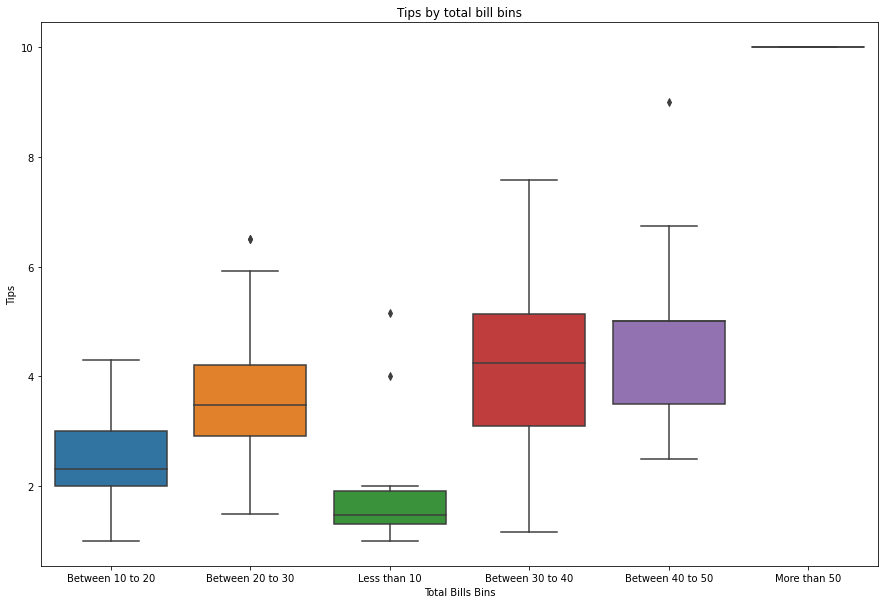

In [24]:
plt.figure(figsize=(15,10))
sns.boxplot(data=waiters_tip_data, y='tip', x='total_bill_bins')
plt.title("Tips by total bill bins")
plt.xlabel("Total Bills Bins")
plt.ylabel("Tips")

- From the above box plot, we can infer that the tip amount and tip density is widest when total bill amount is between 30 to 40
- Therefore, the waiter would like you to generate a bill in that bin (Bettween 30 to 40)

##### Let us try to introduce other categorical columns

In [25]:
waiters_tip_data.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_bins
0,16.99,1.01,Female,No,Sun,Dinner,2,Between 10 to 20
1,10.34,1.66,Male,No,Sun,Dinner,3,Between 10 to 20
2,21.01,3.50,Male,No,Sun,Dinner,3,Between 20 to 30
3,23.68,3.31,Male,No,Sun,Dinner,2,Between 20 to 30
4,24.59,3.61,Female,No,Sun,Dinner,4,Between 20 to 30


In [26]:
ohe_day = pd.get_dummies(waiters_tip_data['day'], prefix='Day')
waiters_tip_data = pd.concat(objs=[waiters_tip_data, ohe_day],axis=1)

In [27]:
ohe_sex = pd.get_dummies(data=waiters_tip_data['sex'], prefix='Gender')
waiters_tip_data = pd.concat([waiters_tip_data, ohe_sex], axis=1)

In [28]:
ohe_time = pd.get_dummies(data=waiters_tip_data['time'], prefix='Time')
waiters_tip_data = pd.concat([waiters_tip_data, ohe_time], axis=1)

In [29]:
waiters_tip_data.drop(columns=['day', 'sex', 'time'], inplace=True)

In [30]:
waiters_tip_data['smoker'] = waiters_tip_data['smoker'].apply(lambda r: 0 if r=='No' else 1)

In [31]:
waiters_tip_data.head()

,total_bill,tip,smoker,size,total_bill_bins,Day_Fri,Day_Sat,Day_Sun,Day_Thur,Gender_Female,Gender_Male,Time_Dinner,Time_Lunch
0,16.99,1.01,0,2,Between 10 to 20,0,0,1,0,1,0,1,0
1,10.34,1.66,0,3,Between 10 to 20,0,0,1,0,0,1,1,0
2,21.01,3.50,0,3,Between 20 to 30,0,0,1,0,0,1,1,0
3,23.68,3.31,0,2,Between 20 to 30,0,0,1,0,0,1,1,0
4,24.59,3.61,0,4,Between 20 to 30,0,0,1,0,1,0,1,0


In [32]:
waiters_tip_data['tip_smoker'] = waiters_tip_data['smoker']*waiters_tip_data['tip']
waiters_tip_data['tip_non_smoker'] = (1-waiters_tip_data['smoker'])*waiters_tip_data['tip']

In [33]:
plot_corr(waiters_tip_data[['total_bill', 'tip', 'tip_smoker', 'tip_non_smoker']])

NameError: name 'plot_corr' is not defined

- from the above correlation, we can infer that the tip is most **strongly correlated with total_bill**

In [ ]:
sns.pairplot(data=waiters_tip_data[['total_bill', 'tip', 'Day_Fri', 'Day_Sat', 'Day_Sun', 'Day_Thur']])

- no correlation with day of the week

###### Answer 6: Substantiate your above inference through appropriate statistical test

- Creating a headmap to see the distribution of tip with the total_bill

<AxesSubplot:xlabel='size', ylabel='total_bill_bins'>

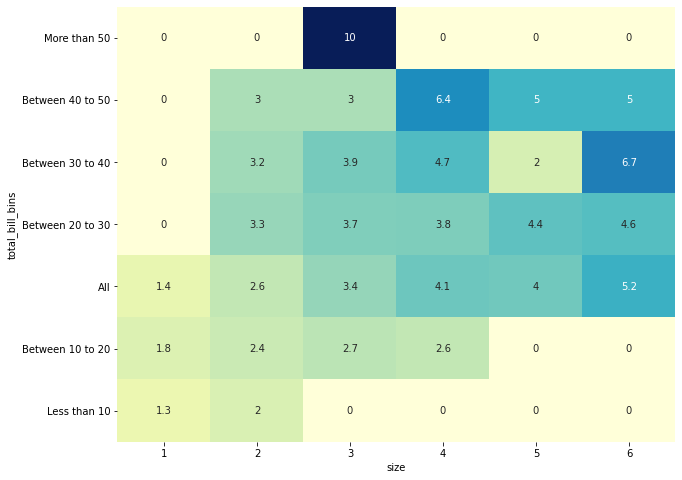

In [34]:
party = waiters_tip_data.pivot_table(index='total_bill_bins', values='tip',columns= 'size',
               aggfunc=np.mean, fill_value=0,margins=True).sort_values(by="All", ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(party.drop('All', axis=1),cmap="YlGnBu", annot=True, cbar=False)

- Hence, it is obvious with the above heatmap that the tip is most when party size is 3 and total bill amount is more than 50 
- However, the average tip amount is also good (second highest) when the total bill is between 30 to 40 and party size is 6

<AxesSubplot:xlabel='size', ylabel='total_bill_bins'>

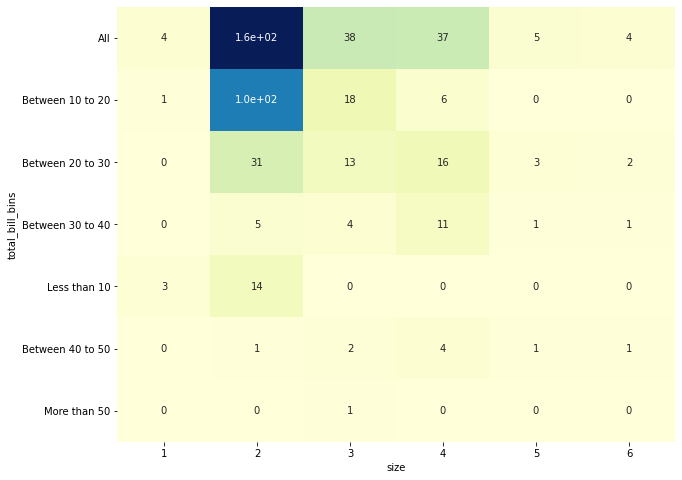

In [35]:
party = waiters_tip_data.pivot_table(index='total_bill_bins', values='tip',columns= 'size',
               aggfunc=np.size, fill_value=0,margins=True).sort_values(by="All", ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(party.drop('All', axis=1),cmap="YlGnBu", annot=True, cbar=False)

- Most tips are given when the party size is 2 and total bill amount is between 10 to 20

<AxesSubplot:xlabel='Day_Fri-Day_Sat-Day_Sun-Day_Thur', ylabel='total_bill_bins'>

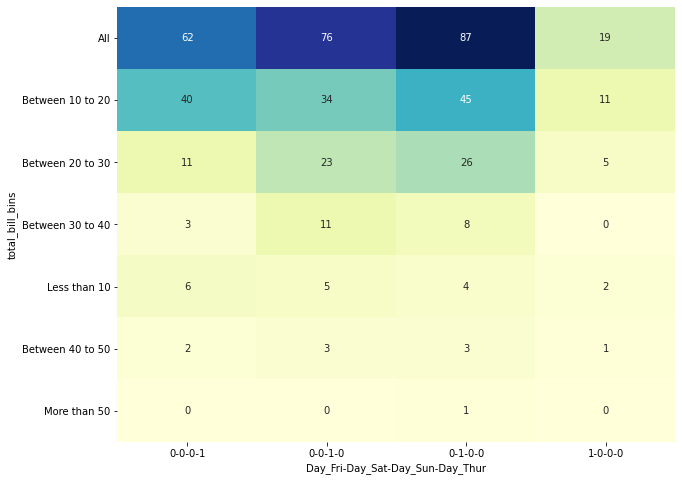

In [36]:
party = waiters_tip_data.pivot_table(index='total_bill_bins', values='tip',columns= ['Day_Fri', 'Day_Sat', 'Day_Sun', 'Day_Thur'],
               aggfunc=np.size, fill_value=0,margins=True).sort_values(by="All", ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(party.drop('All', axis=1),cmap="YlGnBu", annot=True, cbar=False)

- Most tips are given on Saturdays, then on Sundays and then Thursday. Least tips are given on Fridays

<AxesSubplot:xlabel='Day_Fri-Day_Sat-Day_Sun-Day_Thur', ylabel='total_bill_bins'>

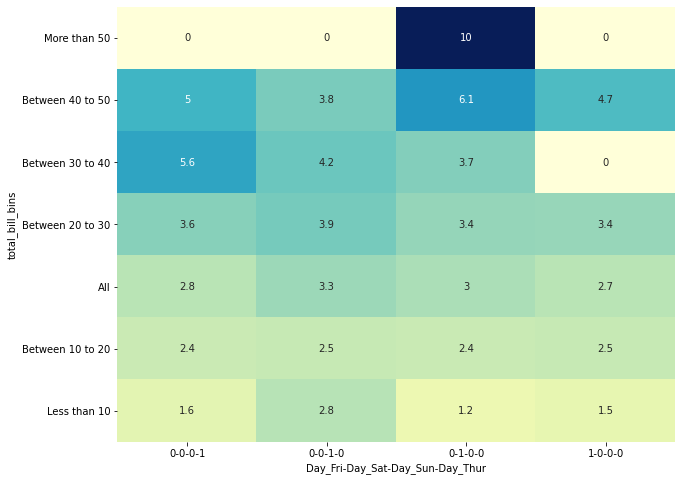

In [37]:
party = waiters_tip_data.pivot_table(index='total_bill_bins', values='tip',columns= ['Day_Fri', 'Day_Sat', 'Day_Sun', 'Day_Thur'],
               aggfunc=np.mean, fill_value=0,margins=True).sort_values(by="All", ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(party.drop('All', axis=1),cmap="YlGnBu", annot=True, cbar=False)

- Biggest average tips are given on Sundays (3.3), then on Saturdays (3) and then Thursday (2.8). Least tips are given on Fridays

###### Answer 7: In the above scatter plot, color each circle by gender and list down your inferences

<AxesSubplot:title={'center':'Scatter plot to visualize the tip amount with total bill'}, xlabel='Total Bill', ylabel='Tip Amount'>

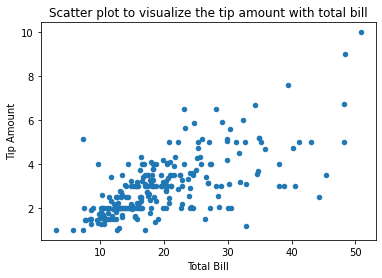

In [38]:
waiters_tip_data.plot(kind='scatter', x='total_bill', y='tip', title='Scatter plot to visualize the tip amount with total bill', ylabel='Tip Amount', xlabel='Total Bill')

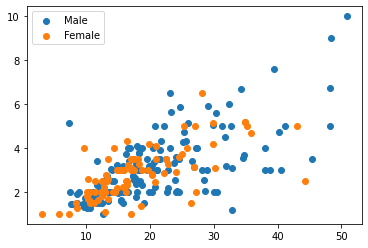

In [39]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x=waiters_tip_data[waiters_tip_data['Gender_Male']==1]['total_bill'], y=waiters_tip_data[waiters_tip_data['Gender_Male']==1]['tip'], label="Male")
ax.scatter(x=waiters_tip_data[waiters_tip_data['Gender_Female']==1]['total_bill'], y=waiters_tip_data[waiters_tip_data['Gender_Female']==1]['tip'], label="Female")
ax.legend()

KeyError: 'sex'

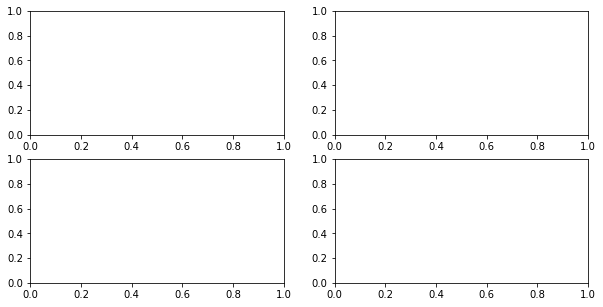

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
waiters_tip_data.boxplot(column='tip', by='sex', ax=ax[0][0])
waiters_tip_data.boxplot(column='tip', by='size', ax=ax[0][1])
waiters_tip_data.boxplot(column='tip', by='smoker', ax=ax[1][0])
waiters_tip_data.boxplot(column='tip', by='day', ax=ax[1][1])